In [1]:
from utils_behavior import Ballpushing_utils

from utils_behavior import Sleap_utils

from pathlib import Path

import pandas as pd

import importlib

In [4]:
importlib.reload(Ballpushing_utils)

<module 'utils_behavior.Ballpushing_utils' from '/home/durrieu/utils_behavior/utils_behavior/Ballpushing_utils.py'>

In [11]:
TestFly_path = Path("/mnt/upramdya_data/MD/MultiMazeRecorder/Videos/240531_MagnetBlock_Videos_Tracked/arena4/corridor4/")

In [8]:
# F1 exp
TestFly_path = Path("/mnt/upramdya_data/MD/F1_Tracks/Videos/240821_F1_3mm_ends_Videos_Checked/arena4/Left")


In [2]:
TestSlp = Sleap_utils.Sleap_Tracks("/mnt/upramdya_data/MD/F1_Tracks/Videos/240821_F1_3mm_ends_Videos_Checked/arena4/Left/arena4_left_tracked_ball_processed.000_arena4_left.analysis.h5")

In [11]:
TestSlp.objects[0].object_data

,frame,time,object,x_centre,y_centre
0,1,0.034483,object_1,46.395609,294.419014
1,2,0.068966,object_1,46.393454,294.419055
2,3,0.103448,object_1,46.391299,294.419096
3,4,0.137931,object_1,46.389143,294.419138
4,5,0.172414,object_1,46.386988,294.419179
...,...,...,...,...,...
261001,261002,9000.068966,object_1,47.371253,175.920539
261002,261003,9000.103448,object_1,47.371249,175.920624
261003,261004,9000.137931,object_1,47.371244,175.920710
261004,261005,9000.172414,object_1,47.371240,175.920796


AttributeError: 'Sleap_Tracks' object has no attribute 'dataset'

In [18]:
TestSlp.objects[0].centre

In [18]:
importlib.reload(Ballpushing_utils)

<module 'utils_behavior.Ballpushing_utils' from '/home/durrieu/utils_behavior/utils_behavior/Ballpushing_utils.py'>

In [19]:
TestFly = Ballpushing_utils.Fly(TestFly_path, as_individual=True)

In [20]:
TestFly.arena_metadata

{'Date': '240821',
 'Genotype': 'PR',
 'Period': 'AM10',
 'FeedingState': 'starved_noWater',
 'Orientation': 'std',
 'Light': 'on',
 'Crossing': '1',
 'Pretraining': 'y',
 'Unlocked': 'yy',
 '': ''}

In [21]:
TestFly.F1_condition

'pretrained_unlocked'

In [7]:
TestFly.flytrack.objects[0].dataset

,frame,time,object,x_thorax,y_thorax,adjusted_time
0,1,0.034483,fly_1,46.995866,515.760397,-3795.241379
1,2,0.068966,fly_1,46.995750,515.733990,-3795.206897
2,3,0.103448,fly_1,46.995635,515.707583,-3795.172414
3,4,0.137931,fly_1,46.995519,515.681175,-3795.137931
4,5,0.172414,fly_1,46.995403,515.654768,-3795.103448
...,...,...,...,...,...,...
261001,261002,9000.068966,fly_1,45.539764,500.960535,5204.793103
261002,261003,9000.103448,fly_1,45.546520,500.943661,5204.827586
261003,261004,9000.137931,fly_1,45.553275,500.926787,5204.862069
261004,261005,9000.172414,fly_1,45.560030,500.909913,5204.896552


In [8]:
TestFly.balltrack.objects[1].dataset

,frame,time,object,x_centre,y_centre,euclidean_distance
0,1,0.034483,ball_2,239.203365,430.395402,0.000000
1,2,0.068966,ball_2,239.203280,430.395488,0.000121
2,3,0.103448,ball_2,239.203196,430.395575,0.000241
3,4,0.137931,ball_2,239.203112,430.395661,0.000362
4,5,0.172414,ball_2,239.203028,430.395747,0.000482
...,...,...,...,...,...,...
261001,261002,9000.068966,ball_2,235.933383,477.956923,47.673799
261002,261003,9000.103448,ball_2,235.933577,477.956769,47.673631
261003,261004,9000.137931,ball_2,235.933772,477.956614,47.673463
261004,261005,9000.172414,ball_2,235.933966,477.956459,47.673296


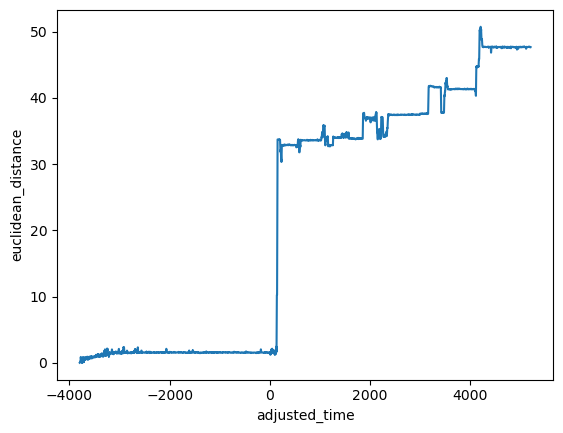

In [10]:
# Plot the second ball relative position across adjusted time

Adjusted_time = TestFly.flytrack.objects[0].dataset['adjusted_time']

Ball_position = TestFly.balltrack.objects[1].dataset['euclidean_distance']

# Plot the second ball relative position across adjusted time
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure()
sns.lineplot(x=Adjusted_time, y=Ball_position)
plt.show()

In [24]:
# Let's make 2 annotated videos for each push / pull event

# First, let's get the push / pull events

pushes = TestFly.metrics["fly_1_ball_1"]["events_direction"][0]

pulls = TestFly.metrics["fly_1_ball_1"]["events_direction"][1]

In [172]:
# Now for the two first pushes and pulls, let's make the videos

for push in pushes[:2]:
    TestFly.flytrack.generate_annotated_video(save=True, output_path = f"/mnt/upramdya_data/MD/Other_Videos/Events_annotation/push{push}.mp4"
    , start = push[0], end = push[1])
for pull in pulls[:2]:
    TestFly.flytrack.generate_annotated_video(save=True, output_path = f"/mnt/upramdya_data/MD/Other_Videos/Events_annotation/pull{pull}.mp4"
    , start = pull[0], end = pull[1])
    
    

No CUDA devices found, falling back to CPU processing.


Processing frames: 100%|██████████| 219/219 [00:05<00:00, 37.80it/s]


No CUDA devices found, falling back to CPU processing.


Processing frames: 100%|██████████| 389/389 [00:09<00:00, 38.91it/s]


No CUDA devices found, falling back to CPU processing.


Processing frames: 100%|██████████| 585/585 [00:15<00:00, 38.98it/s]


No CUDA devices found, falling back to CPU processing.


Processing frames: 100%|██████████| 111/111 [00:03<00:00, 33.20it/s]


In [159]:
TestFly.metrics["fly_1_ball_1"]["events_direction"]

([[np.int64(53651), np.int64(53869), np.int64(218)],
  [np.int64(56493), np.int64(56603), np.int64(110)],
  [np.int64(59233), np.int64(59302), np.int64(69)],
  [np.int64(59711), np.int64(60034), np.int64(323)],
  [np.int64(62187), np.int64(62274), np.int64(87)],
  [np.int64(66494), np.int64(66807), np.int64(313)],
  [np.int64(69427), np.int64(70538), np.int64(1111)]],
 [[np.int64(54166), np.int64(54554), np.int64(388)],
  [np.int64(55126), np.int64(55710), np.int64(584)],
  [np.int64(56022), np.int64(56101), np.int64(79)],
  [np.int64(56889), np.int64(57498), np.int64(609)],
  [np.int64(58541), np.int64(58654), np.int64(113)],
  [np.int64(60964), np.int64(61259), np.int64(295)],
  [np.int64(64498), np.int64(64575), np.int64(77)],
  [np.int64(67637), np.int64(68002), np.int64(365)],
  [np.int64(68769), np.int64(69006), np.int64(237)],
  [np.int64(142259), np.int64(142486), np.int64(227)],
  [np.int64(145511), np.int64(145866), np.int64(355)]])

In [98]:
78416 / 29

2704.0

In [99]:
2704 / 60

45.06666666666667

In [100]:
TestFly.FeedingState

'starved_noWater'

In [101]:
TestFly.interaction_events

{1: {1: [[np.int64(52980), np.int64(53066), np.int64(86)],
   [np.int64(53651), np.int64(53869), np.int64(218)],
   [np.int64(54166), np.int64(54554), np.int64(388)],
   [np.int64(55126), np.int64(55710), np.int64(584)],
   [np.int64(56022), np.int64(56101), np.int64(79)],
   [np.int64(56493), np.int64(56603), np.int64(110)],
   [np.int64(56889), np.int64(57498), np.int64(609)],
   [np.int64(58191), np.int64(58289), np.int64(98)],
   [np.int64(58541), np.int64(58654), np.int64(113)],
   [np.int64(59233), np.int64(59302), np.int64(69)],
   [np.int64(59711), np.int64(60034), np.int64(323)],
   [np.int64(60964), np.int64(61259), np.int64(295)],
   [np.int64(62187), np.int64(62274), np.int64(87)],
   [np.int64(63039), np.int64(63100), np.int64(61)],
   [np.int64(63554), np.int64(63620), np.int64(66)],
   [np.int64(64498), np.int64(64575), np.int64(77)],
   [np.int64(65043), np.int64(65159), np.int64(116)],
   [np.int64(65870), np.int64(66007), np.int64(137)],
   [np.int64(66494), np.int64(

In [102]:
TestFly.get_events_number()

Number of events for 1: 1


{1: 1}

In [106]:
TestFly.metrics["fly_1_ball_1"]

{'final_event': ([np.int64(78416), np.int64(78777), np.int64(361)], 23),
 'significant_events': [[np.int64(53651), np.int64(53869), np.int64(218)],
  [np.int64(54166), np.int64(54554), np.int64(388)],
  [np.int64(55126), np.int64(55710), np.int64(584)],
  [np.int64(56022), np.int64(56101), np.int64(79)],
  [np.int64(56493), np.int64(56603), np.int64(110)],
  [np.int64(56889), np.int64(57498), np.int64(609)],
  [np.int64(58541), np.int64(58654), np.int64(113)],
  [np.int64(59233), np.int64(59302), np.int64(69)],
  [np.int64(59711), np.int64(60034), np.int64(323)],
  [np.int64(60964), np.int64(61259), np.int64(295)],
  [np.int64(62187), np.int64(62274), np.int64(87)],
  [np.int64(64498), np.int64(64575), np.int64(77)],
  [np.int64(66494), np.int64(66807), np.int64(313)],
  [np.int64(67637), np.int64(68002), np.int64(365)],
  [np.int64(68769), np.int64(69006), np.int64(237)],
  [np.int64(69427), np.int64(70538), np.int64(1111)],
  [np.int64(142259), np.int64(142486), np.int64(227)],
  [np

In [115]:
final_event[0][0]

np.int64(78416)

In [141]:
# Make an annotated video of the final event of the fly
final_event = TestFly.metrics["fly_1_ball_1"]["final_event"]

TestFly.balltrack.generate_annotated_video(
    save=True,
    output_path = "/mnt/upramdya_data/MD/Other_Videos/Events_annotation/final_event.mp4",
    start=final_event[0][0],
    end = final_event[0][1]
)


No CUDA devices found, falling back to CPU processing.


Processing frames: 100%|██████████| 610/610 [00:15<00:00, 38.82it/s]


In [121]:
TestFly.interaction_events

{1: {1: [[np.int64(52980), np.int64(53066), np.int64(86)],
   [np.int64(53651), np.int64(53869), np.int64(218)],
   [np.int64(54166), np.int64(54554), np.int64(388)],
   [np.int64(55126), np.int64(55710), np.int64(584)],
   [np.int64(56022), np.int64(56101), np.int64(79)],
   [np.int64(56493), np.int64(56603), np.int64(110)],
   [np.int64(56889), np.int64(57498), np.int64(609)],
   [np.int64(58191), np.int64(58289), np.int64(98)],
   [np.int64(58541), np.int64(58654), np.int64(113)],
   [np.int64(59233), np.int64(59302), np.int64(69)],
   [np.int64(59711), np.int64(60034), np.int64(323)],
   [np.int64(60964), np.int64(61259), np.int64(295)],
   [np.int64(62187), np.int64(62274), np.int64(87)],
   [np.int64(63039), np.int64(63100), np.int64(61)],
   [np.int64(63554), np.int64(63620), np.int64(66)],
   [np.int64(64498), np.int64(64575), np.int64(77)],
   [np.int64(65043), np.int64(65159), np.int64(116)],
   [np.int64(65870), np.int64(66007), np.int64(137)],
   [np.int64(66494), np.int64(

In [125]:
# Plot the ball position during the final event and the 4 previous events

final_event_idx = final_event[1]

events = TestFly.interaction_events[1][1]
 
events_idx = [final_event_idx - 4, final_event_idx - 3, final_event_idx - 2, final_event_idx - 1, final_event_idx]

events_idx

[19, 20, 21, 22, 23]

In [126]:
events[19]

[np.int64(67637), np.int64(68002), np.int64(365)]

In [129]:
for i in events_idx:
    TestFly.balltrack.generate_annotated_video(
        start=events[i][0],
        end=events[i][1],
        save=True,
        output_path = f"/mnt/upramdya_data/MD/Other_Videos/Events_annotation/event_{i}.mp4"
    )

No CUDA devices found, falling back to CPU processing.


Processing frames: 100%|██████████| 366/366 [00:09<00:00, 37.77it/s]


No CUDA devices found, falling back to CPU processing.


Processing frames: 100%|██████████| 238/238 [00:06<00:00, 36.93it/s]


No CUDA devices found, falling back to CPU processing.


Processing frames: 100%|██████████| 1112/1112 [00:32<00:00, 34.37it/s]


No CUDA devices found, falling back to CPU processing.


Processing frames: 100%|██████████| 201/201 [00:05<00:00, 35.84it/s]


No CUDA devices found, falling back to CPU processing.


Processing frames: 100%|██████████| 362/362 [00:09<00:00, 37.90it/s]


In [130]:
# Plot the ball positions

positions = TestFly.balltrack.dataset

positions

,frame,time,object,x_centre,y_centre
0,1,0.034483,ball_1,48.438969,337.431762
1,2,0.068966,ball_1,48.439048,337.431753
2,3,0.103448,ball_1,48.439126,337.431744
3,4,0.137931,ball_1,48.439205,337.431736
4,5,0.172414,ball_1,48.439284,337.431727
...,...,...,...,...,...
156598,156599,5399.965517,ball_1,47.108495,115.377940
156599,156600,5400.000000,ball_1,47.103990,115.382139
156600,156601,5400.034483,ball_1,47.099485,115.386337
156601,156602,5400.068966,ball_1,47.094980,115.390535


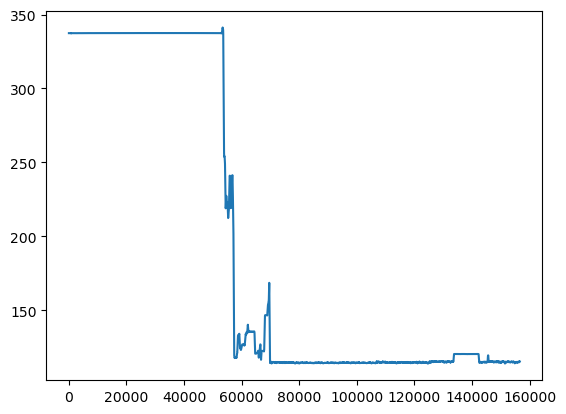

In [131]:
# Plot the y_centre of the ball over time

import matplotlib.pyplot as plt

plt.plot(positions["y_centre"])
plt.show()

In [132]:
# Generate relative positions based on the y_centre

positions["y_relative"] = abs(positions["y_centre"] - positions["y_centre"].iloc[0])

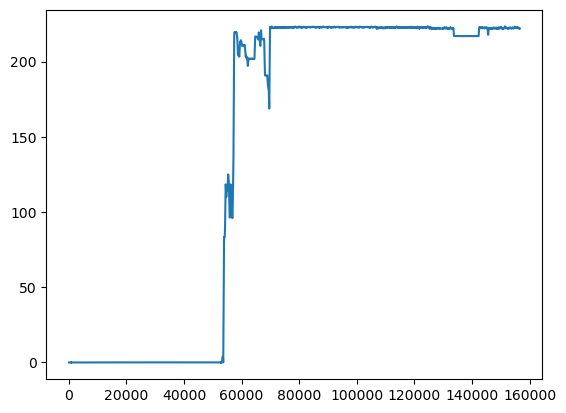

In [133]:
plt.plot(positions["y_relative"])
plt.show()

In [134]:
# get max relative position

max_relative = positions["y_relative"].max()

In [35]:
TestFly.fly_skeleton

In [53]:
TestFly.get_final_event()

{'training': ([np.int64(1190), np.int64(1327), np.int64(137)], 1)}

In [54]:
TestFly.find_events_direction()

{'training': ([[np.int64(407), np.int64(575), np.int64(168)],
   [np.int64(4505), np.int64(4994), np.int64(489)],
   [np.int64(54024), np.int64(54403), np.int64(379)],
   [np.int64(75614), np.int64(76629), np.int64(1015)],
   [np.int64(82840), np.int64(83400), np.int64(560)],
   [np.int64(88671), np.int64(88894), np.int64(223)],
   [np.int64(94103), np.int64(96361), np.int64(2258)]],
  [[np.int64(1848), np.int64(1961), np.int64(113)],
   [np.int64(58404), np.int64(59573), np.int64(1169)],
   [np.int64(87235), np.int64(88421), np.int64(1186)]])}

In [46]:
importlib.reload(Ballpushing_utils)

<module 'utils_behavior.Ballpushing_utils' from '/home/durrieu/utils_behavior/utils_behavior/Ballpushing_utils.py'>

In [47]:
TestFly_F1 = Ballpushing_utils.Fly("/mnt/upramdya_data/MD/F1_Tracks/Videos/240821_F1_3mm_ends_Videos_Checked/arena6/Right", as_individual=True)

Processing fly 1/1
smoothing tracks
Loaded SLEAP tracking file: /mnt/upramdya_data/MD/F1_Tracks/Videos/240821_F1_3mm_ends_Videos_Checked/arena6/Right/arena6_right_rotated_tracked_fly.000_arena6_right_rotated.analysis.h5
N° of objects: 1
Nodes: ['thorax']
Video FPS: 29.0
Processing ball 1/2
smoothing tracks
Processing ball 2/2
smoothing tracks
Loaded SLEAP tracking file: /mnt/upramdya_data/MD/F1_Tracks/Videos/240821_F1_3mm_ends_Videos_Checked/arena6/Right/arena6_right_rotated_tracked_ball_processed.000_arena6_right_rotated.analysis.h5
N° of objects: 2
Nodes: ['centre']
Video FPS: 29.0
Processing ball index: 1
Non-NaN xfly count: 261006, Non-NaN xball count: 261006
Initial separation: 176.94497394316858
Processing ball index: 2
Non-NaN xfly count: 261006, Non-NaN xball count: 0
No valid tracking data for xfly or xball for 2
Final data_dict keys: ['generalisation']
Processing ball type: generalisation
        yball       xball        yfly       xfly  Frame      time  ball_idx  \
0  420.19

KeyError: 'generalisation'

In [23]:
# Load the sleaptrack for the ball for this fly

Slp_test = Sleap_utils.Sleap_Tracks("/mnt/upramdya_data/MD/F1_Tracks/Videos/240821_F1_3mm_ends_Videos_Checked/arena6/Right/arena6_right_rotated_tracked_ball_processed.000_arena6_right_rotated.analysis.h5")

Processing object 1/2
smoothing tracks
Processing object 2/2
smoothing tracks
Loaded SLEAP tracking file: /mnt/upramdya_data/MD/F1_Tracks/Videos/240821_F1_3mm_ends_Videos_Checked/arena6/Right/arena6_right_rotated_tracked_ball_processed.000_arena6_right_rotated.analysis.h5
N° of objects: 2
Nodes: ['centre']
Video FPS: 29.0


In [24]:
Slp_data = Slp_test.dataset

In [91]:
TestFly_F1.find_interaction_events()

{'training': [[np.int64(1462), np.int64(1530), np.int64(68)],
  [np.int64(2095), np.int64(2303), np.int64(208)],
  [np.int64(10405), np.int64(10715), np.int64(310)],
  [np.int64(13479), np.int64(13544), np.int64(65)],
  [np.int64(15629), np.int64(15854), np.int64(225)],
  [np.int64(25725), np.int64(25807), np.int64(82)],
  [np.int64(26775), np.int64(26844), np.int64(69)],
  [np.int64(28589), np.int64(28685), np.int64(96)],
  [np.int64(31717), np.int64(31822), np.int64(105)],
  [np.int64(32033), np.int64(32147), np.int64(114)],
  [np.int64(32855), np.int64(33147), np.int64(292)],
  [np.int64(34537), np.int64(34715), np.int64(178)],
  [np.int64(36221), np.int64(36490), np.int64(269)],
  [np.int64(38106), np.int64(38195), np.int64(89)],
  [np.int64(38465), np.int64(38592), np.int64(127)],
  [np.int64(38827), np.int64(38891), np.int64(64)],
  [np.int64(41289), np.int64(42055), np.int64(766)],
  [np.int64(43416), np.int64(43479), np.int64(63)],
  [np.int64(44527), np.int64(44787), np.int64(

In [94]:
TestFly_F1.find_adjusted_time([10, 20, 50])

{'training': ({10: np.float64(1059.1333333333334),
   20: np.float64(1096.9666666666667),
   50: np.float64(3061.633333333333)},
  {10: nan, 20: nan, 50: nan}),
 'generalisation': ({10: np.float64(5189.133333333333),
   20: np.float64(5233.5),
   50: np.float64(5644.9)},
  {10: np.float64(2020.0333333333333),
   20: np.float64(2064.4),
   50: np.float64(2475.7999999999997)})}

In [63]:
importlib.reload(Ballpushing_utils)

<module 'utils_behavior.Ballpushing_utils' from '/home/durrieu/utils_behavior/utils_behavior/Ballpushing_utils.py'>

In [64]:
# 2 min with threadpool

In [65]:
TestExp_F1 = Ballpushing_utils.Experiment("/mnt/upramdya_data/MD/F1_Tracks/Videos/240821_F1_3mm_ends_Videos_Checked")

Loading fly from /mnt/upramdya_data/MD/F1_Tracks/Videos/240821_F1_3mm_ends_Videos_Checked/arena2/Right
F1_condition for 240821_F1_3mm_ends_Videos_Checked_arena2_Right: control
Loading fly from /mnt/upramdya_data/MD/F1_Tracks/Videos/240821_F1_3mm_ends_Videos_Checked/arena2/Left
F1_condition for 240821_F1_3mm_ends_Videos_Checked_arena2_Left: control
Loading fly from /mnt/upramdya_data/MD/F1_Tracks/Videos/240821_F1_3mm_ends_Videos_Checked/arena7/Right
F1_condition for 240821_F1_3mm_ends_Videos_Checked_arena7_Right: pretrained_unlocked
Loading fly from /mnt/upramdya_data/MD/F1_Tracks/Videos/240821_F1_3mm_ends_Videos_Checked/arena7/Left
F1_condition for 240821_F1_3mm_ends_Videos_Checked_arena7_Left: pretrained_unlocked
Loading fly from /mnt/upramdya_data/MD/F1_Tracks/Videos/240821_F1_3mm_ends_Videos_Checked/arena6/Right
F1_condition for 240821_F1_3mm_ends_Videos_Checked_arena6_Right: control
Loading fly from /mnt/upramdya_data/MD/F1_Tracks/Videos/240821_F1_3mm_ends_Videos_Checked/arena6/Lef

In [ ]:
for fly in TestExp_F1.flies:
    print(fly.arena_metadata)


In [56]:
importlib.reload(Ballpushing_utils)

<module 'utils_behavior.Ballpushing_utils' from '/home/durrieu/utils_behavior/utils_behavior/Ballpushing_utils.py'>

In [66]:
TestDataset = Ballpushing_utils.Dataset(TestExp_F1)

In [58]:
print(TestDataset)

Dataset with 18 flies and 1 experiments
keyword: 


In [59]:
TestDataset.metadata

[]

In [67]:
TestDataset_coordinates = TestDataset.generate_dataset()

In [68]:
TestDataset_coordinates

,time,frame,adjusted_time,x_fly_0,y_fly_0,distance_fly_0,x_ball_0,y_ball_0,distance_ball_0,fly,...,Orientation,Light,Crossing,Pretraining,Unlocked,,F1_condition,x_ball_1,y_ball_1,distance_ball_1
0,0.034483,1,-3824.724138,0.000000,0.000000,0.000000,193.522196,-73.328572,0.000000,240821_F1_3mm_ends_Videos_Checked_arena8_Left,...,std,on,1,n,nn,,control,NaN,NaN,NaN
1,0.068966,2,-3824.689655,0.043280,0.044952,0.062401,193.522271,-73.327362,0.001211,240821_F1_3mm_ends_Videos_Checked_arena8_Left,...,std,on,1,n,nn,,control,NaN,NaN,NaN
2,0.103448,3,-3824.655172,0.086561,0.089905,0.124802,193.522346,-73.326153,0.002423,240821_F1_3mm_ends_Videos_Checked_arena8_Left,...,std,on,1,n,nn,,control,NaN,NaN,NaN
3,0.137931,4,-3824.620690,0.129841,0.134857,0.187203,193.522420,-73.324944,0.003634,240821_F1_3mm_ends_Videos_Checked_arena8_Left,...,std,on,1,n,nn,,control,NaN,NaN,NaN
4,0.172414,5,-3824.586207,0.173121,0.179809,0.249604,193.522495,-73.323735,0.004846,240821_F1_3mm_ends_Videos_Checked_arena8_Left,...,std,on,1,n,nn,,control,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108499,3741.379310,108500,-47.068966,10.929188,-231.967009,232.224332,13.470580,-408.303889,172.516296,240821_F1_3mm_ends_Videos_Checked_arena9_Left,...,std,on,1,y,yy,,pretrained_unlocked,202.075195,-77.317457,1.919479
108500,3741.413793,108501,-47.034483,10.883633,-233.614116,233.867503,12.597173,-409.852148,174.042649,240821_F1_3mm_ends_Videos_Checked_arena9_Left,...,std,on,1,y,yy,,pretrained_unlocked,202.075195,-77.317457,1.919479
108501,3741.448276,108502,-47.000000,10.839357,-235.281614,235.531165,11.723815,-411.400291,175.573616,240821_F1_3mm_ends_Videos_Checked_arena9_Left,...,std,on,1,y,yy,,pretrained_unlocked,202.075195,-77.317457,1.919479
108502,3741.482759,108503,-46.965517,10.796188,-236.895962,237.141845,10.850425,-412.948344,177.109097,240821_F1_3mm_ends_Videos_Checked_arena9_Left,...,std,on,1,y,yy,,pretrained_unlocked,202.075195,-77.317457,1.919479


In [62]:
TestDataset_coordinates.columns

Index(['time', 'frame', 'adjusted_time', 'x_fly_0', 'y_fly_0',
       'distance_fly_0', 'x_ball_0', 'y_ball_0', 'distance_ball_0', 'fly',
       'flypath', 'experiment', 'Nickname', 'Brain region', 'Date', 'Genotype',
       'Period', 'FeedingState', 'Orientation', 'Light', 'Crossing',
       'Pretraining', 'Unlocked', '', 'x_ball_1', 'y_ball_1',
       'distance_ball_1'],
      dtype='object')

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define the downsampling factor
downsample_factor = (29*5)  # Adjust this value as needed

# Reset the index of the DataFrame to avoid duplicate labels
TestDataset_coordinates = TestDataset_coordinates.reset_index(drop=True)

# Filter the DataFrame to include only rows where adjusted_time is positive
filtered_data = TestDataset_coordinates[TestDataset_coordinates["adjusted_time"] >= 0]

# Downsample the DataFrame by selecting every nth row
downsampled_data = filtered_data.iloc[::downsample_factor, :]

# Plot the data
sns.lineplot(
    x="adjusted_time",
    y="distance_ball_0",
    hue="F1_condition",
    data=downsampled_data[downsampled_data["F1_condition"] == "control"],
)

sns.lineplot(
    x="adjusted_time",
    y="distance_ball_1",
    hue="F1_condition",
    data=downsampled_data[downsampled_data["F1_condition"] != "control"],
)

# Set the x-axis limits to start at 0
plt.xlim(left=0)

# Show the plot
plt.show()

In [38]:
# Generate a dataset with adjusted time and relative ball position for all flies

Data = []

for fly in TestExp_F1.flies:
    if fly.Pretraining =="y":

        if fly.exit_time:
            Adjusted_time = fly.flytrack.objects[0].dataset["adjusted_time"]

            Ball_position = fly.balltrack.objects[1].dataset["euclidean_distance"]
            
            Pretraining = fly.Pretraining

            dataset = pd.DataFrame({"adjusted_time": Adjusted_time, "ball_position": Ball_position, "Pretraining": Pretraining})
            Data.append(dataset)

    else:
        Adjusted_time = fly.flytrack.objects[0].dataset["adjusted_time"]

        Ball_position = fly.balltrack.objects[0].dataset["euclidean_distance"]
        
        Pretraining = fly.Pretraining

        dataset = pd.DataFrame(
            {"adjusted_time": Adjusted_time, "ball_position": Ball_position, "Pretraining": Pretraining}
        )
        Data.append(dataset)


# Concatenate the data

Data = pd.concat(Data)

Data

,adjusted_time,ball_position,Pretraining
0,-751.517241,0.000000,n
1,-751.482759,0.000449,n
2,-751.448276,0.000898,n
3,-751.413793,0.001347,n
4,-751.379310,0.001796,n
...,...,...,...
261001,5211.620690,96.193105,y
261002,5211.655172,96.192678,y
261003,5211.689655,96.192253,y
261004,5211.724138,96.191827,y


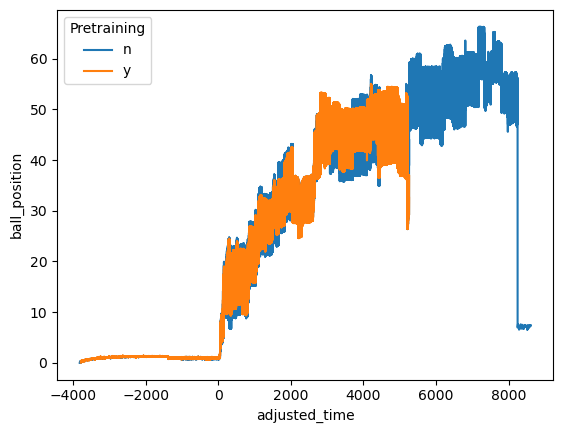

In [41]:
# Now plot the the average ball position over adjusted time with scale starting at 0 grouped by pretraining

import seaborn as sns
import matplotlib.pyplot as plt

Avg = Data.groupby(["adjusted_time", "Pretraining"]).mean().reset_index()

# Apply some smoothing to the ball_position

Avg["ball_position"] = Avg["ball_position"].rolling(window=10).mean()

plt.figure()

sns.lineplot(x="adjusted_time", y="ball_position", data=Avg, hue="Pretraining")

plt.show()

In [17]:
print(TestExp_F1)

Experiment: 240821_F1_3mm_ends_Videos_Checked
  Genotypes: PR
  Flies: 9
  FPS: 29


In [128]:
data = Ballpushing_utils.Dataset(TestExp_F1)

In [129]:
str(data)

'Dataset with 9 flies and 1 experiments\nkeyword: '

In [133]:
importlib.reload(Ballpushing_utils)

<module 'utils_behavior.Ballpushing_utils' from '/home/durrieu/utils_behavior/utils_behavior/Ballpushing_utils.py'>

In [134]:
data.generate_dataset()

An error occurred: The truth value of a DataFrame is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().


Traceback (most recent call last):
  File "/home/durrieu/utils_behavior/utils_behavior/Ballpushing_utils.py", line 1842, in generate_dataset
    for fly in self.flies:
                      ^^^^
  File "/home/durrieu/utils_behavior/utils_behavior/Ballpushing_utils.py", line 1893, in _prepare_dataset_coordinates
    pandas.DataFrame: A DataFrame containing the fly's coordinates and associated metadata.
       ^^^^^^^^^^^^
  File "/home/durrieu/miniforge3/envs/tracking_analysis/lib/python3.12/site-packages/pandas/core/generic.py", line 1577, in __nonzero__
    raise ValueError(
ValueError: The truth value of a DataFrame is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().


{}